Dataset loaded successfully. Shape: (1267, 24)
Features shape: (1267, 23)
Target shape: (1267,)
Train set shape: (1013, 23) (1013,)
Validation set shape: (254, 23) (254,)

Lasso Regression (Tuned)
RMSE: 0.7649210258601914
MAE: 0.19449124339723525
R²: 0.008689811512145207

Ridge Regression (Tuned)
RMSE: 0.784028315056725
MAE: 0.2613686490414969
R²: -0.041453459757464284

Weighted Average Ensemble
RMSE: 0.7682665725031929
MAE: 0.2041426041411951
R²: -5.68326156136223e-07


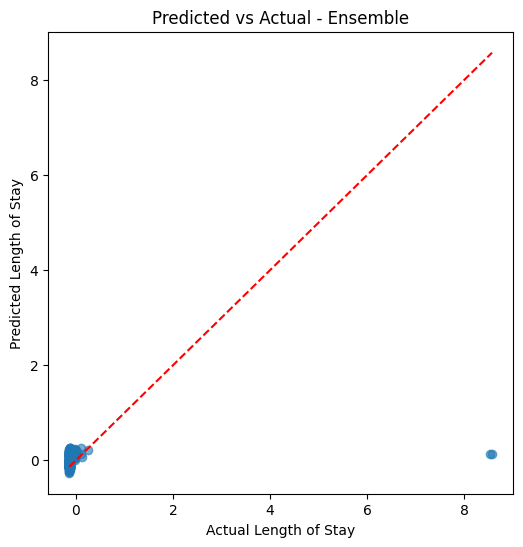

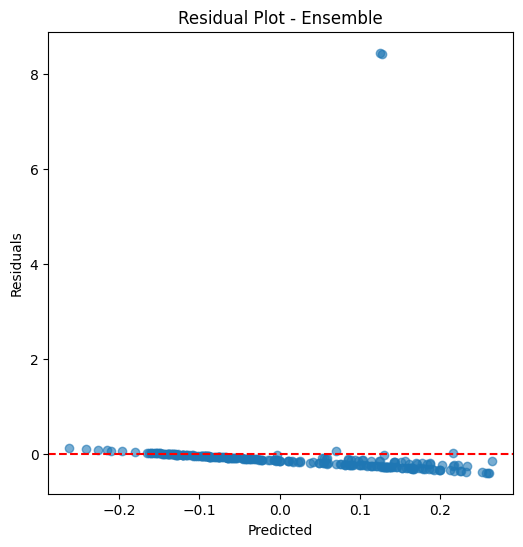


Final Metrics Table
           Model      RMSE       MAE            R²
0  Lasso (Tuned)  0.764921  0.194491  8.689812e-03
1  Ridge (Tuned)  0.784028  0.261369 -4.145346e-02
2       Ensemble  0.768267  0.204143 -5.683262e-07


In [10]:
# ================================
# STEP 0: Import Libraries
# ================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ================================
# STEP 1: Load Dataset
# ================================
df = pd.read_csv(r"C:\Users\skova\Processed_Kova_Data_NoHotEncoding.csv")
print("Dataset loaded successfully. Shape:", df.shape)

# ================================
# STEP 2: Define Features (X) and Target (y)
# ================================
target_col = 'Length of stay_min'  # Actual target column

X = df.drop(columns=[target_col])
y = df[target_col]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# ================================
# STEP 3: Train-Validation Split
# ================================
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

# ================================
# STEP 4: Hyperparameter Tuning - Lasso Regression
# ================================
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=5000))
])

param_grid_lasso = {
    'lasso__alpha': np.logspace(-4, 1, 20)
}

grid_lasso = GridSearchCV(
    lasso_pipeline,
    param_grid_lasso,
    scoring='neg_root_mean_squared_error',
    cv=5
)

grid_lasso.fit(X_train, y_train)

best_lasso = grid_lasso.best_estimator_

# Evaluate Lasso
y_pred_lasso = best_lasso.predict(X_val)
rmse_lasso = np.sqrt(mean_squared_error(y_val, y_pred_lasso))  # ✅ works in all sklearn versions
mae_lasso = mean_absolute_error(y_val, y_pred_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

print("\nLasso Regression (Tuned)")
print("RMSE:", rmse_lasso)
print("MAE:", mae_lasso)
print("R²:", r2_lasso)

# ================================
# STEP 5: Hyperparameter Tuning - Ridge Regression (Optional)
# ================================
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid_ridge = {
    'ridge__alpha': np.logspace(-4, 2, 20)
}

grid_ridge = GridSearchCV(
    ridge_pipeline,
    param_grid_ridge,
    scoring='neg_root_mean_squared_error',
    cv=5
)

grid_ridge.fit(X_train, y_train)

best_ridge = grid_ridge.best_estimator_

# Evaluate Ridge
y_pred_ridge = best_ridge.predict(X_val)
rmse_ridge = np.sqrt(mean_squared_error(y_val, y_pred_ridge))
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)

print("\nRidge Regression (Tuned)")
print("RMSE:", rmse_ridge)
print("MAE:", mae_ridge)
print("R²:", r2_ridge)

# ================================
# STEP 6: Weighted Average Ensemble (Optional)
# ================================
y_pred_ensemble = 0.6 * y_pred_lasso + 0.4 * y_pred_ridge

rmse_ens = np.sqrt(mean_squared_error(y_val, y_pred_ensemble))
mae_ens = mean_absolute_error(y_val, y_pred_ensemble)
r2_ens = r2_score(y_val, y_pred_ensemble)

print("\nWeighted Average Ensemble")
print("RMSE:", rmse_ens)
print("MAE:", mae_ens)
print("R²:", r2_ens)

# ================================
# STEP 7: Plots
# ================================

# Predicted vs Actual (Ensemble)
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_pred_ensemble, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Actual Length of Stay")
plt.ylabel("Predicted Length of Stay")
plt.title("Predicted vs Actual - Ensemble")
plt.show()

# Residual Plot
residuals = y_val - y_pred_ensemble
plt.figure(figsize=(6,6))
plt.scatter(y_pred_ensemble, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot - Ensemble")
plt.show()

# ================================
# STEP 8: Final Metrics Table
# ================================
metrics_table = pd.DataFrame({
    "Model": ["Lasso (Tuned)", "Ridge (Tuned)", "Ensemble"],
    "RMSE": [rmse_lasso, rmse_ridge, rmse_ens],
    "MAE": [mae_lasso, mae_ridge, mae_ens],
    "R²": [r2_lasso, r2_ridge, r2_ens]
})

print("\nFinal Metrics Table")
print(metrics_table)


In [11]:
import joblib
joblib.dump(best_lasso, "best_lasso_model.pkl")
joblib.dump(best_ridge, "best_ridge_model.pkl")
joblib.dump(y_pred_ensemble, "ensemble_predictions.pkl")  # Optional


['ensemble_predictions.pkl']